<a href="https://colab.research.google.com/github/Abdoul1996/Statistic-learning/blob/main/simulation_Estimators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW: Simulation Estimator Properties

## 1.C Lognormal Distribution

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
mu = 2
sigma = 1

In [26]:
# set up the seed
np.random.seed(42)
# samples distribution.
X = np.random.lognormal(mean = mu, sigma = sigma, size=(1000,10))
X

array([[12.14252984,  6.43489613, 14.12135991, ..., 15.91774826,
         4.62060484, 12.71217307],
       [ 4.64867535,  4.63793974,  9.41178165, ..., 10.11730509,
         2.98015682,  1.79983735],
       [31.99721184,  5.89570252,  7.90525877, ..., 10.75852021,
         4.05261078,  5.51960473],
       ...,
       [ 2.96658602, 14.90042735, 17.20626045, ...,  3.0014001 ,
         2.68401669,  1.27130142],
       [ 4.73132214,  4.46503772, 12.50260822, ...,  1.25109323,
         2.77057055,  3.41844705],
       [30.98877431,  8.94818498, 14.32732788, ...,  3.6498398 ,
        12.13101714, 14.07483504]])

In [4]:
X.shape

(1000, 10)

In [5]:
# Sampling from log X
logX = np.log(X)

In [6]:
logX

array([[2.49671415, 1.8617357 , 2.64768854, ..., 2.76743473, 1.53052561,
        2.54256004],
       [1.53658231, 1.53427025, 2.24196227, ..., 2.31424733, 1.09197592,
        0.5876963 ],
       [3.46564877, 1.7742237 , 2.0675282 , ..., 2.37569802, 1.39936131,
        1.70830625],
       ...,
       [1.0874118 , 2.70138989, 2.8452733 , ..., 1.09907888, 0.98731444,
        0.24004112],
       [1.55420469, 1.49627766, 2.52593728, ..., 0.22401775, 1.01905327,
        1.22918637],
       [3.43362502, 2.19145072, 2.66216875, ..., 1.29468328, 2.49576557,
        2.64438845]])

Text(0, 0.5, 'Frequency')

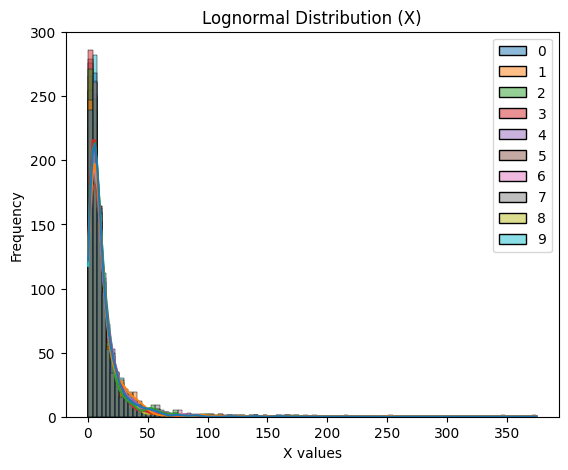

In [7]:
# Plot histograms side by side
plt.figure(figsize=(14, 5))

# Plot Lognormal Distribution
plt.subplot(1, 2, 1)
sns.histplot(X, kde=True, bins=100, color="skyblue")
plt.title("Lognormal Distribution (X)")
plt.xlabel("X values")
plt.ylabel("Frequency")

In [8]:
X[:4]

array([[12.14252984,  6.43489613, 14.12135991, 33.88694566,  5.84652008,
         5.84661606, 35.84531286, 15.91774826,  4.62060484, 12.71217307],
       [ 4.64867535,  4.63793974,  9.41178165,  1.090591  ,  1.31663886,
         4.21105189,  2.68362604, 10.11730509,  2.98015682,  1.79983735],
       [31.99721184,  5.89570252,  7.90525877,  1.77757809,  4.28712899,
         8.25585454,  2.33732339, 10.75852021,  4.05261078,  5.51960473],
       [ 4.04828522, 47.10024414,  7.28999438,  2.56584811, 16.81960066,
         2.17963264,  9.10536313,  1.04115417,  1.95778543,  8.99673052]])

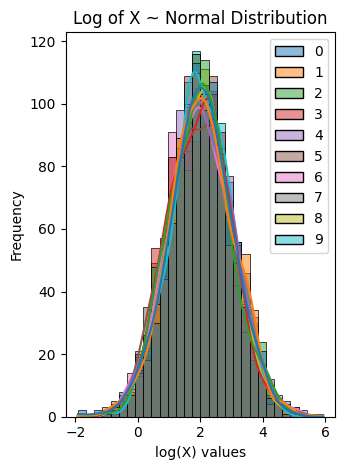

In [9]:
# Plot Normal (log-transformed) Distribution
plt.subplot(1, 2, 2)
sns.histplot(logX, kde=True, bins=30, color="salmon")
plt.title("Log of X ~ Normal Distribution")
plt.xlabel("log(X) values")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

compute estimator for each sample

In [10]:
# MLE of mu
mu_mle = np.mean(logX, axis=1)
mu_mle[:5], len(mu_mle)

(array([2.44806111, 1.20934177, 1.77815644, 1.68989333, 1.74717783]), 1000)

In [11]:
# MLE of sigma ^2 ==> Biased
sigma_mle = np.mean((logX - mu_mle[:,None])**2, axis=1)
sigma_mle[:5]

array([0.47046695, 0.51346393, 0.59618667, 1.18040613, 0.729983  ])

In [12]:
# sigma unbiased
sigma_unbiased = np.var(logX, axis=1, ddof=1)
sigma_unbiased[:5]

array([0.52274105, 0.57051548, 0.66242963, 1.31156237, 0.81109222])

Compute simulated biases

In [27]:
#True mu
u = mu
true_sigma = sigma**2

# Bias Calculations
# Bias = mean_estimator - true mu
bias_mu_mle = np.mean(mu_mle) - u
bias_sigma_mle = np.mean(sigma_mle) - true_sigma
bias_sigma_unbiased = np.mean(sigma_unbiased) - true_sigma

In [28]:
print(f"bias_mu_mle: {bias_mu_mle:.5f}")
print(f"bias sigma mle: {bias_sigma_mle:.5f}")
print(f"bias sigma unbiased: {bias_sigma_unbiased:.5f}")

bias_mu_mle: -0.00214
bias sigma mle: -0.09166
bias sigma unbiased: 0.00926


## 1.d Answer

## 1.e MOM Estimators

In [15]:
# sample mean and sample mean square
X_bar = np.mean(X, axis=1)
X2_bar = np.mean(X**2, axis=1)

In [16]:
# MOM estimators
mu_mom = 2 * np.log(X_bar) - 0.5 * np.log(X2_bar)
sigma_mom = np.log(X2_bar) - 2 * np.log(X_bar)

In [17]:
# To get the simulate bias
bias_mu_mom = np.mean(mu_mom) - u
bias_sigma_mom = np.mean(sigma_mom) - true_sigma

In [18]:
# Print results
print(f"Bias of mu_MoM: {bias_mu_mom:.5f}")
print(f"Bias of sigma^2_MoM: {bias_sigma_mom:.5f}")

Bias of mu_MoM: 0.11591
Bias of sigma^2_MoM: -0.37408


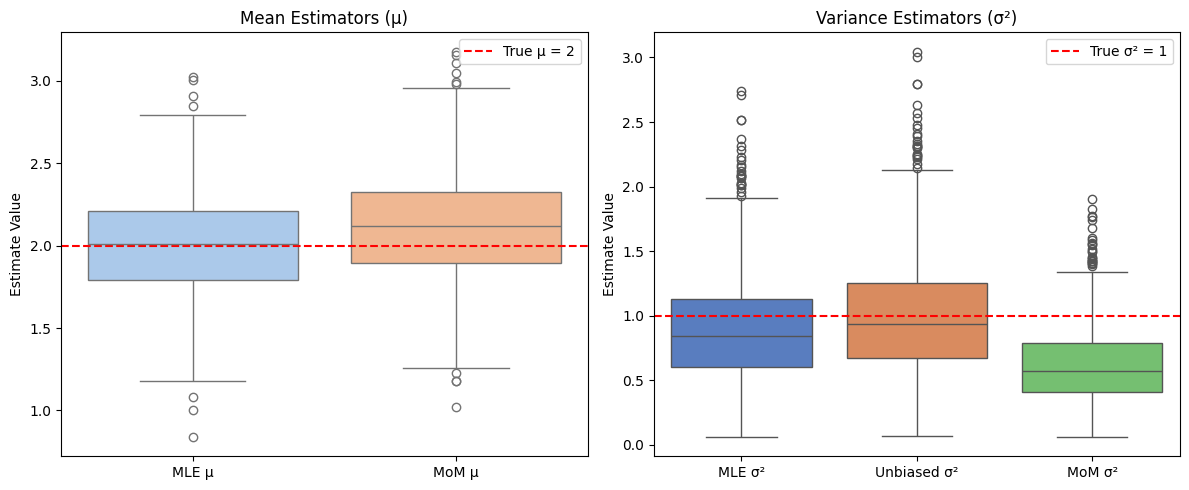

In [19]:
# Plotting mean estimators
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=[mu_mle, mu_mom], palette="pastel")
plt.xticks([0, 1], ['MLE μ', 'MoM μ'])
plt.axhline(mu, color='red', linestyle='--', label='True μ = 2')
plt.title("Mean Estimators (μ)")
plt.ylabel("Estimate Value")
plt.legend()

# Plotting variance estimators
plt.subplot(1, 2, 2)
sns.boxplot(data=[sigma_mle, sigma_unbiased, sigma_mom], palette="muted")
plt.xticks([0, 1, 2], ['MLE σ²', 'Unbiased σ²', 'MoM σ²'])
plt.axhline(sigma**2, color='red', linestyle='--', label='True σ² = 1')
plt.title("Variance Estimators (σ²)")
plt.ylabel("Estimate Value")
plt.legend()

plt.tight_layout()
plt.show()

Summary:

*   The MLE estimator for 𝜇 performs better than the MoM estimator.
It is less biased (closer to the true mean of 2) and has lower variance.
This makes MLE more reliable for estimating the mean of a lognormal distribution.
*   From the boxplot, we observe that the Unbiased variance estimator is the most centered around the true value 𝜎
2
=
1 (indicated by the red dashed line). This suggests that the correction applied to the MLE (dividing by
n−1 instead of
𝑛) successfully removes the downward bias, making it an unbiased estimator.



*  The MLE variance estimator consistently underestimates the true variance — its median is below 1, which confirms the known bias of this estimator when using
𝑛 in the denominator.
*   The MoM variance estimator performs even worse. It is more biased downward, and its entire distribution is shifted lower. This suggests that the MoM estimator for
𝜎
2
  is biased and less accurate, with higher variability and greater chance of underestimation compared to both MLE and the unbiased estimator.





## 1.f answer:

* For the MoM estimate of
𝜇, the median is noticeably above the true value (μ=2), indicating an upward bias. This suggests that, on average, the estimator tends to overestimate the true mean.

* For the MoM estimate of
σ
2
 , the performance is worse. The entire distribution of the estimates is shifted well below the true value (
σ
2
 =1), indicating a clear downward bias. The MoM variance estimator is not only biased but also shows less stability and greater variability compared to MLE and the unbiased estimator.

## 2. Efficiency

**2.b)**

In [20]:
v# From 1.C mu_mle = np.mean(logX, axis=1)
len(mu_mle)


1000

In [37]:
# computed the simulated variance mu MLE
simulated_var_mu_mle = np.var(mu_mle, ddof=0)
print(f"Variance MLE: {simulated_var_mu_mle}")


Variance MLE: 0.0985985136083304


In [34]:
# Calculating CRLB
# CRLB = sigma^2 / n
# Sigma = 1 & n = 10 because each sample of size 10
crlb = 1 / 10
print(f" Theoritical CRLB: {crlb}")


 Theoritical CRLB: 0.1


Simulated Variance: 0.09849991509472207
Theoretical CRLB: 0.1
The simulated variance differs noticeably from CRLB.


## 3. Consistency

**3.b)**

In [43]:
np.random.seed(42)
epsilon = 0.01
sample_sizes = [10, 100, 1000]
reps = 1000

for n in sample_sizes:
    # Generate 1000 samples of size n
    X = np.random.lognormal(mean=mu, sigma=sigma, size=(reps, n))

    # MLE of mu: mean of log(X)
    logX = np.log(X)
    mu_mle = np.mean(logX, axis=1)

    # MoM of mu: 2ln(X̄) - 1/2 ln( (1/n) ∑ X^2 )
    X_bar = np.mean(X, axis=1)
    X_sq_bar = np.mean(X**2, axis=1)
    mu_mom = 2 * np.log(X_bar) - 0.5 * np.log(X_sq_bar)

    # Consistency check: P(|estimator - μ| < ε)
    prob_mle = np.mean(np.abs(mu_mle - mu) < epsilon)
    prob_mom = np.mean(np.abs(mu_mom - mu) < epsilon)

    print(f"n = {n}:")
    print(f"  P(|μ_MLE - μ| < {epsilon}) ≈ {prob_mle:.4f}")
    print(f"  P(|μ_MoM - μ| < {epsilon}) ≈ {prob_mom:.4f}\n")


n = 10:
  P(|μ_MLE - μ| < 0.01) ≈ 0.0260
  P(|μ_MoM - μ| < 0.01) ≈ 0.0250

n = 100:
  P(|μ_MLE - μ| < 0.01) ≈ 0.0910
  P(|μ_MoM - μ| < 0.01) ≈ 0.0580

n = 1000:
  P(|μ_MLE - μ| < 0.01) ≈ 0.2480
  P(|μ_MoM - μ| < 0.01) ≈ 0.1580

